In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv(r"/kaggle/input/gender-classification-dataset/gender_classification_v7.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
data['gender']

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object

In [5]:
data['gender'] = data['gender'].map({'Male' : 1 , 'Female' : 0})

In [6]:
data['gender']

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [7]:
X = data.drop('gender' , axis = 1)
y = data['gender']

In [8]:
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = .20 , random_state = 42)

In [10]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((4000, 7), (1001, 7), (4000,), (1001,))

In [11]:
exp = setup(
    data=X_train, 
    target=y_train,
    normalize=True,
    transformation=True,
    remove_outliers=True,
    fix_imbalance=True,  
     
)

best_model = compare_models(sort = 'F1')
evaluate_model(best_model)

,Description,Value
0,Session id,2488
1,Target,gender
2,Target type,Binary
3,Original data shape,"(4000, 8)"
4,Transformed data shape,"(3898, 8)"
5,Transformed train set shape,"(2698, 8)"
6,Transformed test set shape,"(1200, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9732,0.9969,0.9679,0.9785,0.9731,0.9464,0.9467,0.0310
gbc,Gradient Boosting Classifier,0.9732,0.9964,0.9636,0.9827,0.9729,0.9464,0.9468,0.0370
lightgbm,Light Gradient Boosting Machine,0.9718,0.9965,0.9679,0.9759,0.9717,0.9436,0.9440,0.1340
rf,Random Forest Classifier,0.9696,0.9949,0.9650,0.9742,0.9695,0.9393,0.9395,0.0490
xgboost,Extreme Gradient Boosting,0.9679,0.9961,0.9650,0.9708,0.9678,0.9357,0.9359,0.0620
nb,Naive Bayes,0.9679,0.9962,0.9536,0.9818,0.9673,0.9357,0.9364,0.0250
lr,Logistic Regression,0.9661,0.9960,0.9593,0.9728,0.9659,0.9321,0.9325,0.2480
qda,Quadratic Discriminant Analysis,0.9646,0.9957,0.9507,0.9782,0.9641,0.9293,0.9299,0.0210
ridge,Ridge Classifier,0.9643,0.9956,0.9579,0.9704,0.9640,0.9286,0.9289,0.0230
lda,Linear Discriminant Analysis,0.9643,0.9957,0.9579,0.9704,0.9640,0.9286,0.9289,0.0220


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
predictions = predict_model(best_model , X_test)

In [13]:
predictions.prediction_label[120:130]

1370    0
1057    1
4817    1
199     0
2280    1
4750    1
2220    0
4683    1
2819    1
3150    0
Name: prediction_label, dtype: int32

In [14]:
y_test[120:130]

1370    0
1057    1
4817    1
199     0
2280    1
4750    1
2220    0
4683    1
2819    1
3150    0
Name: gender, dtype: int64

In [15]:
confusion_matrix(y_test , predictions.prediction_label)

array([[492,  10],
       [ 25, 474]], dtype=int64)

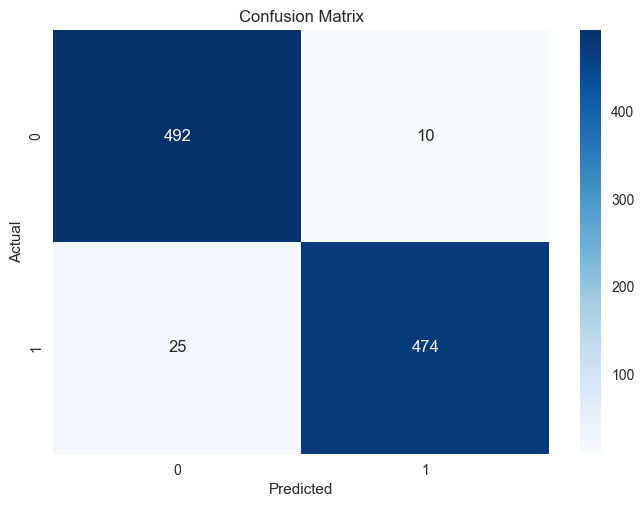

In [16]:
sns.heatmap(confusion_matrix(y_test , predictions.prediction_label) , annot = True , fmt = 'd' , cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score 

In [18]:
from sklearn.model_selection import GridSearchCV

# تعريف معاملات الضبط
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# البحث عن أفضل معاملات
gb = GradientBoostingClassifier()
grid_search = GridSearchCV(gb, params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("أفضل معلمات:", grid_search.best_params_)

أفضل معلمات: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [19]:
LRM = LogisticRegression()
RFM = RandomForestClassifier()
DTM = DecisionTreeClassifier()
SVCM = SVC()
GBC = GradientBoostingClassifier(n_estimators= 50 , max_depth = 3 , learning_rate = 0.1)

In [20]:
models = [LRM , RFM , DTM , SVCM , GBC]
results = {}
for model in models:
    print(f'The Model is {model}')
    k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, X_train , y_train, cv=k_folds)
    
    #print("K-Fold Cross-Validation Scores:", scores)
    
    mean_accuracy = np.mean(scores)
    results[model] = mean_accuracy
    print("Mean Accuracy:", mean_accuracy)
    print('-------------------------')
    

The Model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Mean Accuracy: 0.96975
-------------------------
The Model is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
Mean Accuracy: 0.974
-------------------------
The Model 

In [21]:
best_model = max(results, key=results.get)
print(f'The best model is {best_model} with a mean accuracy of {results[best_model]}')

best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

The best model is GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=50, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) with a mean accuracy of 0.9785


In [22]:
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Test Accuracy: 0.967032967032967
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       502
           1       0.99      0.95      0.97       499

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [23]:
confusion_matrix(y_test, y_pred_best)

array([[496,   6],
       [ 27, 472]], dtype=int64)

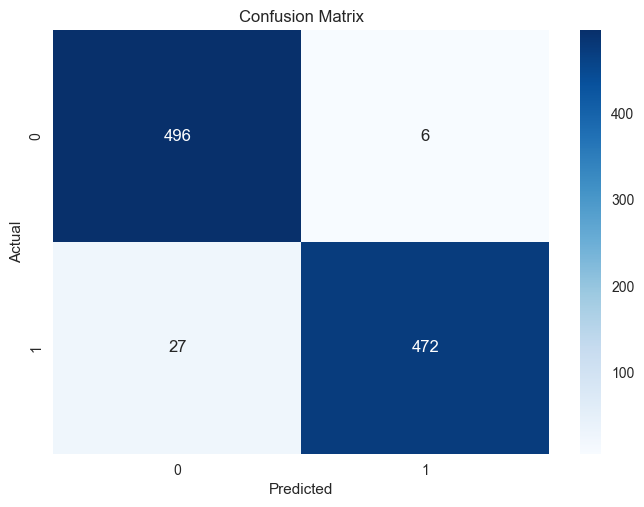

In [26]:
sns.heatmap(confusion_matrix(y_test , y_pred_best) , annot = True , fmt = 'd' , cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

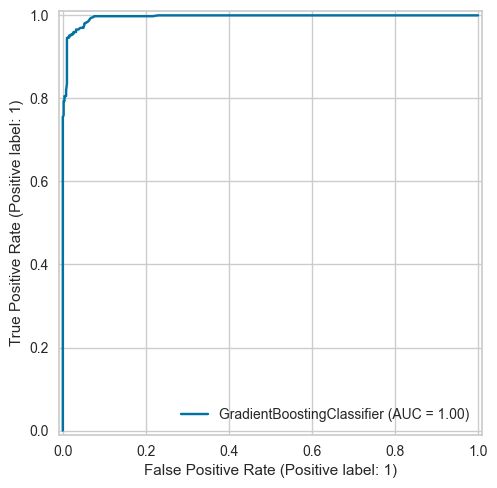

In [25]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()